In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from gensim.models import Word2Vec
import string
from tqdm import tqdm
from keras import applications
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
import json
from keras.models import Model,Sequential

In [26]:
df=pd.read_csv("captions.txt",sep=",")

In [27]:
df.head(1)

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...


In [28]:
df.shape

(40455, 2)

In [29]:
df["image"].isnull().sum(),df["caption"].isnull().sum()

(0, 0)

In [30]:
df["image"].unique().shape #e have 8k image

(8091,)

In [31]:
# Lets Read image and convert to vector
def convert_image_to_vector(df):
    unique_image_id=df["image"].unique() #we have 8k images
    d={}
    model=InceptionV3(weights="imagenet")
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    for i in tqdm(range(0,len(unique_image_id),1000)):
        d1={}
        for j in unique_image_id[i:i+1000]:
            img=load_img('E:\\Machine_learning_projects\\Image_Captioning_1\\Images\\{}'.format(j)).resize([299,299]) #resizing into same shape
            img=img_to_array(img)
            img=preprocess_input(img) #preprocess converts every pixel value between -1 to +1
            d1[j]=model.predict(img.reshape(-1,299,299,3),verbose=0).tolist() #here it will give feature vector of (1,2048) shape
        d.update(d1)
    with open('Data\\image_to_vectors_8k.json', 'w') as fp:
        json.dump(d, fp)

In [32]:
convert_image_to_vector(df)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [51:01<00:00, 340.19s/it]


# Sample how flow goes

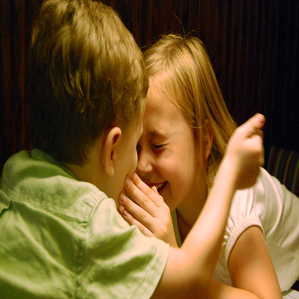

In [10]:
img=load_img('E:\\Machine_learning_projects\\Image_Captioning_1\\Images\\{}'.format("1425485485_d7c97a5470.jpg")).resize([299,299])
img

In [16]:
img=img_to_array(img)
img.shape

(299, 299, 3)

In [17]:
img=preprocess_input(img)
img.shape

(299, 299, 3)

In [23]:
model=InceptionV3(weights="imagenet")
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
model.predict(img.reshape(-1,299,299,3),verbose=0)

array([[0.35824406, 0.31094095, 0.41645926, ..., 0.6829732 , 0.2002821 ,
        0.06698375]], dtype=float32)

# Reading File

In [23]:
#reading the file
f = open('image_to_vectors_8k.json')
d = json.load(f)

In [26]:
np.array(d[df["image"][8000]]).shape

(1, 4096)